# <center> Machine Learning Modelling and Evaluation (Stage 3) </center>
**Pulang Pegi** <br>
- Anan Agrani <br>
- Augita Dewabrata <br>
- Aulia Gita Pratiwi <br>
- Dhyana Rara Ayu Gandini <br>
- Fitrah Alamsyah <br>
- Khalid Atthariq Wiraguna Aseran <br>

# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams
from scipy import stats

rcParams['figure.figsize'] = 20, 10
rcParams['lines.linewidth'] = 3
rcParams['xtick.labelsize'] = 'x-large'
rcParams['ytick.labelsize'] = 'x-large'

# Load Dataset

In [2]:
df_sumber = pd.read_csv ('hotel_booking1.csv')
pd.set_option('display.max_columns', None) #show all column
df_sumber.sample(2)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card
54424,City Hotel,1,210,2016,July,29,15,2,2,2,0.0,0,HB,PRT,Groups,TA/TO,0,0,0,A,A,0,Non Refund,1.0,NaN,0,Transient,96.00,0,0,Canceled,2016-03-16,Gene Smith,Gene_S68@aol.com,988-086-5834,************9319
9072,Resort Hotel,1,54,2016,October,44,26,2,6,2,0.0,0,BB,IRL,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,240.0,NaN,0,Transient,74.04,0,0,Canceled,2016-09-02,Charles Duarte,Duarte.Charles@xfinity.com,309-358-8720,************6394


In [3]:
# pengelompokan kolom berdasarkan jenisnya
cats = ['hotel','meal','country','market_segment','distribution_channel','reserved_room_type','assigned_room_type',
        'deposit_type','customer_type','reservation_status']
boolean = ['is_canceled','is_repeated_guest']
nums = ['lead_time','stays_in_weekend_nights','stays_in_week_nights','adults','children','babies',
        'days_in_waiting_list','adr','total_of_special_requests','previous_cancellations','previous_bookings_not_canceled',
        'booking_changes','required_car_parking_spaces']
timestamp = ['arrival_date_year','arrival_date_month','arrival_date_week_number','arrival_date_day_of_month',
             'reservation_status_date']

# Data Preparation

## Missing Value

In [4]:
# Percentage dari missing Value

percent_missing = df_sumber.isnull().sum() * 100 / len(df_sumber)
missing_value_df = pd.DataFrame({'column_name': df_sumber.columns,
                                 ' total_missing' : df_sumber.isnull().sum(),
                                 'percent_missing': round(percent_missing,3)})
missing_value_df 

,column_name,total_missing,percent_missing
hotel,hotel,0,0.000
is_canceled,is_canceled,0,0.000
lead_time,lead_time,0,0.000
arrival_date_year,arrival_date_year,0,0.000
arrival_date_month,arrival_date_month,0,0.000
arrival_date_week_number,arrival_date_week_number,0,0.000
arrival_date_day_of_month,arrival_date_day_of_month,0,0.000
stays_in_weekend_nights,stays_in_weekend_nights,0,0.000
stays_in_week_nights,stays_in_week_nights,0,0.000
adults,adults,0,0.000


Jadi ada 4 kolom yang memiliki missing value atau nilai kosong yaitu :<br>
1. `Children` : 4 baris atau 0.003%
2. `Country` : 488 baris atau  0.409%
3. `Agent` : 16.340 baris atau  13.686 %
4. `Company` : 112.593 baris atau 94.307%

In [5]:
# Fill Missing Value

# children and country fill with mode
df_sumber['children'].fillna(df_sumber['children'].mode()[0], inplace=True)
df_sumber['country'].fillna(df_sumber['country'].mode()[0], inplace=True)

# drop agent and company
df_sumber = df_sumber.drop(columns=['agent','company'])

In [6]:
percent_missing = df_sumber.isnull().sum() * 100 / len(df_sumber)
missing_value_df = pd.DataFrame({'column_name': df_sumber.columns,
                                 ' total_missing' : df_sumber.isnull().sum(),
                                 'percent_missing': round(percent_missing,3)})
missing_value_df 

,column_name,total_missing,percent_missing
hotel,hotel,0,0.0
is_canceled,is_canceled,0,0.0
lead_time,lead_time,0,0.0
arrival_date_year,arrival_date_year,0,0.0
arrival_date_month,arrival_date_month,0,0.0
arrival_date_week_number,arrival_date_week_number,0,0.0
arrival_date_day_of_month,arrival_date_day_of_month,0,0.0
stays_in_weekend_nights,stays_in_weekend_nights,0,0.0
stays_in_week_nights,stays_in_week_nights,0,0.0
adults,adults,0,0.0


Missing value already filled

## Duplicated Data

In [7]:
df_sumber.duplicated().sum()

0

## Outlier

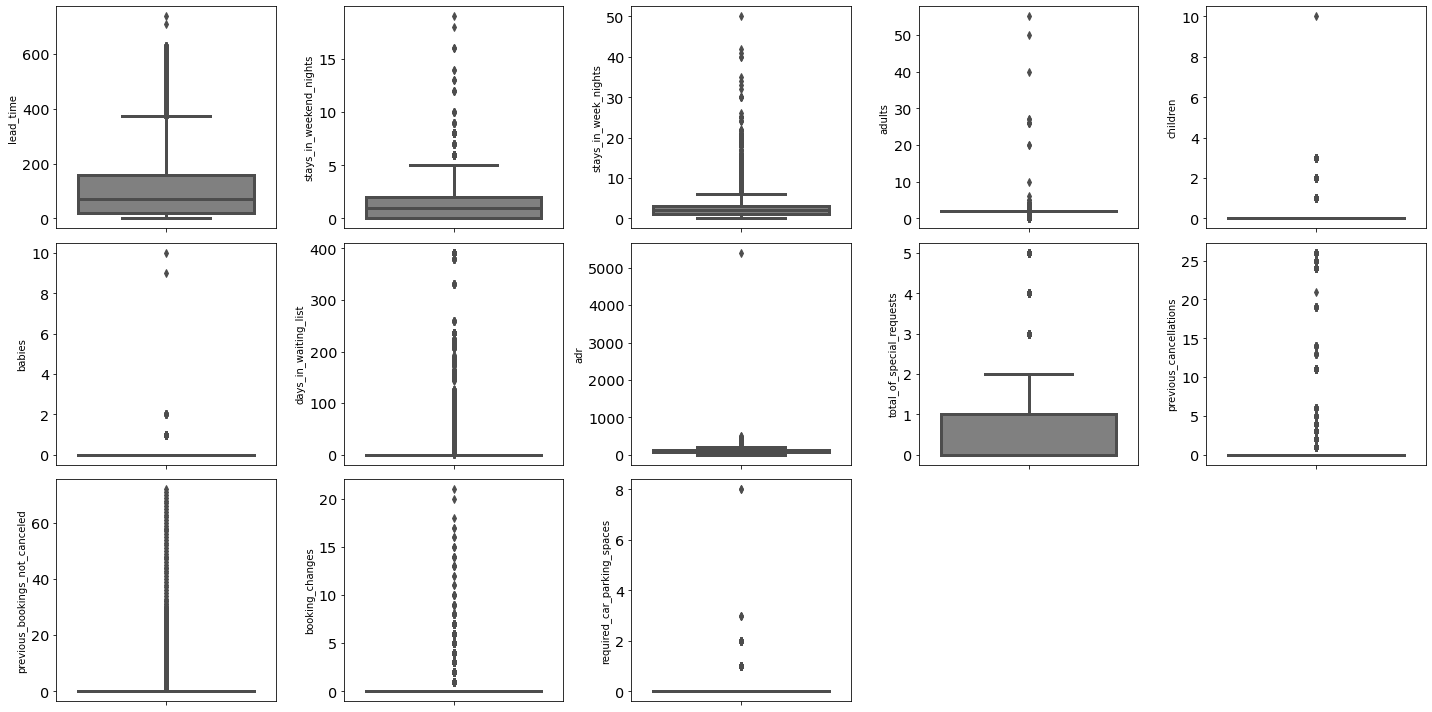

In [8]:
for i in range(0, len(nums)):
    plt.subplot(3, 5, i+1)
    sns.boxplot(y=df_sumber[nums[i]], color='gray', orient='v')
    plt.tight_layout()

Outliers are ignored because the emphasis will be on using models that are resistant to outliers

## New Feature

In [9]:
df = df_sumber

In [10]:
# fitur country_type

country_type = []

for index, kolom in df.iterrows():
    country = kolom['country']

    if country == 'PRT':
        result = 'local'
    else:
        result = 'international'
        
    country_type.append(result)
    
df['country_type'] = country_type

pd.set_option('display.max_columns', None)
df[7: 14]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card,country_type
7,Resort Hotel,0,9,2015,July,27,1,0,2,2,0.0,0,FB,PRT,Direct,Direct,0,0,0,C,C,0,No Deposit,0,Transient,103.00,0,1,Check-Out,2015-07-03,William Velez,Velez_William@mail.com,286-669-4333,************8729,local
8,Resort Hotel,1,85,2015,July,27,1,0,3,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient,82.00,0,1,Canceled,2015-05-06,Steven Murphy,Steven.Murphy54@aol.com,341-726-5787,************3639,local
9,Resort Hotel,1,75,2015,July,27,1,0,3,2,0.0,0,HB,PRT,Offline TA/TO,TA/TO,0,0,0,D,D,0,No Deposit,0,Transient,105.50,0,0,Canceled,2015-04-22,Michael Moore,MichaelMoore81@outlook.com,316-648-6176,************9190,local
10,Resort Hotel,1,23,2015,July,27,1,0,4,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,0,Transient,123.00,0,0,Canceled,2015-06-23,Priscilla Collins PhD,PhD.Priscilla74@att.com,833-887-7898,************4642,local
11,Resort Hotel,0,35,2015,July,27,1,0,4,2,0.0,0,HB,PRT,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,0,Transient,145.00,0,0,Check-Out,2015-07-05,Laurie Smith,Smith.Laurie@att.com,804-383-4080,************5450,local
12,Resort Hotel,0,68,2015,July,27,1,0,4,2,0.0,0,BB,USA,Online TA,TA/TO,0,0,0,D,E,0,No Deposit,0,Transient,97.00,0,3,Check-Out,2015-07-05,Casey Thomas,Casey_T78@outlook.com,211-071-2173,************8518,international
13,Resort Hotel,0,18,2015,July,27,1,0,4,2,1.0,0,HB,ESP,Online TA,TA/TO,0,0,0,G,G,1,No Deposit,0,Transient,154.77,0,1,Check-Out,2015-07-05,Rachel Friedman,Rachel.F@protonmail.com,435-075-8409,************9767,international


In [11]:
#fitur total_guest

total_guest = (df['adults']+df['babies']+df['children'])
    
df['total_guest'] = total_guest

pd.set_option('display.max_columns', None)
df[7: 14]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card,country_type,total_guest
7,Resort Hotel,0,9,2015,July,27,1,0,2,2,0.0,0,FB,PRT,Direct,Direct,0,0,0,C,C,0,No Deposit,0,Transient,103.00,0,1,Check-Out,2015-07-03,William Velez,Velez_William@mail.com,286-669-4333,************8729,local,2.0
8,Resort Hotel,1,85,2015,July,27,1,0,3,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient,82.00,0,1,Canceled,2015-05-06,Steven Murphy,Steven.Murphy54@aol.com,341-726-5787,************3639,local,2.0
9,Resort Hotel,1,75,2015,July,27,1,0,3,2,0.0,0,HB,PRT,Offline TA/TO,TA/TO,0,0,0,D,D,0,No Deposit,0,Transient,105.50,0,0,Canceled,2015-04-22,Michael Moore,MichaelMoore81@outlook.com,316-648-6176,************9190,local,2.0
10,Resort Hotel,1,23,2015,July,27,1,0,4,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,0,Transient,123.00,0,0,Canceled,2015-06-23,Priscilla Collins PhD,PhD.Priscilla74@att.com,833-887-7898,************4642,local,2.0
11,Resort Hotel,0,35,2015,July,27,1,0,4,2,0.0,0,HB,PRT,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,0,Transient,145.00,0,0,Check-Out,2015-07-05,Laurie Smith,Smith.Laurie@att.com,804-383-4080,************5450,local,2.0
12,Resort Hotel,0,68,2015,July,27,1,0,4,2,0.0,0,BB,USA,Online TA,TA/TO,0,0,0,D,E,0,No Deposit,0,Transient,97.00,0,3,Check-Out,2015-07-05,Casey Thomas,Casey_T78@outlook.com,211-071-2173,************8518,international,2.0
13,Resort Hotel,0,18,2015,July,27,1,0,4,2,1.0,0,HB,ESP,Online TA,TA/TO,0,0,0,G,G,1,No Deposit,0,Transient,154.77,0,1,Check-Out,2015-07-05,Rachel Friedman,Rachel.F@protonmail.com,435-075-8409,************9767,international,3.0


In [12]:
# fitur total stay

total_stay = (df['stays_in_weekend_nights']+df['stays_in_week_nights'])
    
df['total_stay'] = total_stay

pd.set_option('display.max_columns', None)
df[7: 14]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card,country_type,total_guest,total_stay
7,Resort Hotel,0,9,2015,July,27,1,0,2,2,0.0,0,FB,PRT,Direct,Direct,0,0,0,C,C,0,No Deposit,0,Transient,103.00,0,1,Check-Out,2015-07-03,William Velez,Velez_William@mail.com,286-669-4333,************8729,local,2.0,2
8,Resort Hotel,1,85,2015,July,27,1,0,3,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient,82.00,0,1,Canceled,2015-05-06,Steven Murphy,Steven.Murphy54@aol.com,341-726-5787,************3639,local,2.0,3
9,Resort Hotel,1,75,2015,July,27,1,0,3,2,0.0,0,HB,PRT,Offline TA/TO,TA/TO,0,0,0,D,D,0,No Deposit,0,Transient,105.50,0,0,Canceled,2015-04-22,Michael Moore,MichaelMoore81@outlook.com,316-648-6176,************9190,local,2.0,3
10,Resort Hotel,1,23,2015,July,27,1,0,4,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,0,Transient,123.00,0,0,Canceled,2015-06-23,Priscilla Collins PhD,PhD.Priscilla74@att.com,833-887-7898,************4642,local,2.0,4
11,Resort Hotel,0,35,2015,July,27,1,0,4,2,0.0,0,HB,PRT,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,0,Transient,145.00,0,0,Check-Out,2015-07-05,Laurie Smith,Smith.Laurie@att.com,804-383-4080,************5450,local,2.0,4
12,Resort Hotel,0,68,2015,July,27,1,0,4,2,0.0,0,BB,USA,Online TA,TA/TO,0,0,0,D,E,0,No Deposit,0,Transient,97.00,0,3,Check-Out,2015-07-05,Casey Thomas,Casey_T78@outlook.com,211-071-2173,************8518,international,2.0,4
13,Resort Hotel,0,18,2015,July,27,1,0,4,2,1.0,0,HB,ESP,Online TA,TA/TO,0,0,0,G,G,1,No Deposit,0,Transient,154.77,0,1,Check-Out,2015-07-05,Rachel Friedman,Rachel.F@protonmail.com,435-075-8409,************9767,international,3.0,4


In [13]:
#fitur musim_reservation

#seperate year, month and day from reservation_status_date
df[['rsv_Year', 'rsv_Month','rsv_Day']] = df['reservation_status_date'].str.split('-', 3, expand=True)

condlist = [df['rsv_Month'].str.contains('03|04|05'), df['rsv_Month'].str.contains('06|07|08'),
           df['rsv_Month'].str.contains('09|10|11'),df['rsv_Month'].str.contains('12|01|02')]
condcat = ['Spring','Summer','Autumn','Winter']
df['musim_reservation'] = np.select(condlist,condcat)
df[7: 14]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card,country_type,total_guest,total_stay,rsv_Year,rsv_Month,rsv_Day,musim_reservation
7,Resort Hotel,0,9,2015,July,27,1,0,2,2,0.0,0,FB,PRT,Direct,Direct,0,0,0,C,C,0,No Deposit,0,Transient,103.00,0,1,Check-Out,2015-07-03,William Velez,Velez_William@mail.com,286-669-4333,************8729,local,2.0,2,2015,07,03,Summer
8,Resort Hotel,1,85,2015,July,27,1,0,3,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient,82.00,0,1,Canceled,2015-05-06,Steven Murphy,Steven.Murphy54@aol.com,341-726-5787,************3639,local,2.0,3,2015,05,06,Spring
9,Resort Hotel,1,75,2015,July,27,1,0,3,2,0.0,0,HB,PRT,Offline TA/TO,TA/TO,0,0,0,D,D,0,No Deposit,0,Transient,105.50,0,0,Canceled,2015-04-22,Michael Moore,MichaelMoore81@outlook.com,316-648-6176,************9190,local,2.0,3,2015,04,22,Spring
10,Resort Hotel,1,23,2015,July,27,1,0,4,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,0,Transient,123.00,0,0,Canceled,2015-06-23,Priscilla Collins PhD,PhD.Priscilla74@att.com,833-887-7898,************4642,local,2.0,4,2015,06,23,Summer
11,Resort Hotel,0,35,2015,July,27,1,0,4,2,0.0,0,HB,PRT,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,0,Transient,145.00,0,0,Check-Out,2015-07-05,Laurie Smith,Smith.Laurie@att.com,804-383-4080,************5450,local,2.0,4,2015,07,05,Summer
12,Resort Hotel,0,68,2015,July,27,1,0,4,2,0.0,0,BB,USA,Online TA,TA/TO,0,0,0,D,E,0,No Deposit,0,Transient,97.00,0,3,Check-Out,2015-07-05,Casey Thomas,Casey_T78@outlook.com,211-071-2173,************8518,international,2.0,4,2015,07,05,Summer
13,Resort Hotel,0,18,2015,July,27,1,0,4,2,1.0,0,HB,ESP,Online TA,TA/TO,0,0,0,G,G,1,No Deposit,0,Transient,154.77,0,1,Check-Out,2015-07-05,Rachel Friedman,Rachel.F@protonmail.com,435-075-8409,************9767,international,3.0,4,2015,07,05,Summer


In [14]:
#fitur musim_arrival

condlist = [df['arrival_date_month'].str.contains('March|April|May'), df['arrival_date_month'].str.contains('June|July|August'),
           df['arrival_date_month'].str.contains('September|October|November'),df['arrival_date_month'].str.contains('December|January|February')]
condcat = ['Spring','Summer','Autumn','Winter']
df['musim_arrival'] = np.select(condlist,condcat)
df[7: 14]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card,country_type,total_guest,total_stay,rsv_Year,rsv_Month,rsv_Day,musim_reservation,musim_arrival
7,Resort Hotel,0,9,2015,July,27,1,0,2,2,0.0,0,FB,PRT,Direct,Direct,0,0,0,C,C,0,No Deposit,0,Transient,103.00,0,1,Check-Out,2015-07-03,William Velez,Velez_William@mail.com,286-669-4333,************8729,local,2.0,2,2015,07,03,Summer,Summer
8,Resort Hotel,1,85,2015,July,27,1,0,3,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient,82.00,0,1,Canceled,2015-05-06,Steven Murphy,Steven.Murphy54@aol.com,341-726-5787,************3639,local,2.0,3,2015,05,06,Spring,Summer
9,Resort Hotel,1,75,2015,July,27,1,0,3,2,0.0,0,HB,PRT,Offline TA/TO,TA/TO,0,0,0,D,D,0,No Deposit,0,Transient,105.50,0,0,Canceled,2015-04-22,Michael Moore,MichaelMoore81@outlook.com,316-648-6176,************9190,local,2.0,3,2015,04,22,Spring,Summer
10,Resort Hotel,1,23,2015,July,27,1,0,4,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,0,Transient,123.00,0,0,Canceled,2015-06-23,Priscilla Collins PhD,PhD.Priscilla74@att.com,833-887-7898,************4642,local,2.0,4,2015,06,23,Summer,Summer
11,Resort Hotel,0,35,2015,July,27,1,0,4,2,0.0,0,HB,PRT,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,0,Transient,145.00,0,0,Check-Out,2015-07-05,Laurie Smith,Smith.Laurie@att.com,804-383-4080,************5450,local,2.0,4,2015,07,05,Summer,Summer
12,Resort Hotel,0,68,2015,July,27,1,0,4,2,0.0,0,BB,USA,Online TA,TA/TO,0,0,0,D,E,0,No Deposit,0,Transient,97.00,0,3,Check-Out,2015-07-05,Casey Thomas,Casey_T78@outlook.com,211-071-2173,************8518,international,2.0,4,2015,07,05,Summer,Summer
13,Resort Hotel,0,18,2015,July,27,1,0,4,2,1.0,0,HB,ESP,Online TA,TA/TO,0,0,0,G,G,1,No Deposit,0,Transient,154.77,0,1,Check-Out,2015-07-05,Rachel Friedman,Rachel.F@protonmail.com,435-075-8409,************9767,international,3.0,4,2015,07,05,Summer,Summer


## Feature Encoding

In [15]:
for cat in ['hotel', 'meal','deposit_type','customer_type','market_segment','distribution_channel', 
            'country_type','arrival_date_year','reserved_room_type','musim_arrival','musim_reservation','rsv_Year']:
  onehots = pd.get_dummies(df[cat], prefix=cat)
  df = df.join(onehots)
    
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 96 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119390 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

## Drop Columns

In [16]:
df = df.drop(columns=['name', 'email', 'phone-number','credit_card', #too many unique value
                      'hotel','meal','deposit_type','customer_type','market_segment','distribution_channel','country_type','arrival_date_year','reserved_room_type', 
                      'musim_arrival', 'rsv_Year','musim_reservation', #the original column from encoding feature
                      'adults','babies','children','country','stays_in_weekend_nights', 'stays_in_week_nights','arrival_date_month','rsv_Month','reservation_status_date',
                      'arrival_date_day_of_month', #the original column from new feature
                      'assigned_room_type', 'arrival_date_week_number','rsv_Day', #
                      'reservation_status', #has the same information as the is_cancelled column 
                     ])
df.sample(5)

,is_canceled,lead_time,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,total_guest,total_stay,hotel_City Hotel,hotel_Resort Hotel,meal_BB,meal_FB,meal_HB,meal_SC,meal_Undefined,deposit_type_No Deposit,deposit_type_Non Refund,deposit_type_Refundable,customer_type_Contract,customer_type_Group,customer_type_Transient,customer_type_Transient-Party,market_segment_Aviation,market_segment_Complementary,market_segment_Corporate,market_segment_Direct,market_segment_Groups,market_segment_Offline TA/TO,market_segment_Online TA,market_segment_Undefined,distribution_channel_Corporate,distribution_channel_Direct,distribution_channel_GDS,distribution_channel_TA/TO,distribution_channel_Undefined,country_type_international,country_type_local,arrival_date_year_2015,arrival_date_year_2016,arrival_date_year_2017,reserved_room_type_A,reserved_room_type_B,reserved_room_type_C,reserved_room_type_D,reserved_room_type_E,reserved_room_type_F,reserved_room_type_G,reserved_room_type_H,reserved_room_type_L,reserved_room_type_P,musim_arrival_Autumn,musim_arrival_Spring,musim_arrival_Summer,musim_arrival_Winter,musim_reservation_Autumn,musim_reservation_Spring,musim_reservation_Summer,musim_reservation_Winter,rsv_Year_2014,rsv_Year_2015,rsv_Year_2016,rsv_Year_2017
40047,0,214,0,0,0,0,0,85.8,0,0,2.0,10,0,1,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1
60051,1,74,0,0,0,0,0,155.5,0,0,2.0,8,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0
6021,1,78,0,0,0,0,0,80.0,0,0,2.0,1,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0
96688,0,68,0,0,0,1,0,87.3,0,2,3.0,2,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0
111799,0,90,0,0,0,0,0,117.0,0,0,2.0,2,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1


## Class Imbalance

In [17]:
class_imbalance_percentage = df['is_canceled'].value_counts()* 100 / len(df)
class_imbalance = pd.DataFrame({' total_row' : df['is_canceled'].value_counts(),
                                 'percentage': round(class_imbalance_percentage,3)})
class_imbalance

,total_row,percentage
0,75166,62.958
1,44224,37.042


Because the percentage of minority class (1) is 37.042%, the target column, 'is cancelled,' belongs to the mild balance class

# Modeling

## Splitting Data

In [18]:
dataset = df
X = dataset.drop(columns=['is_canceled'])
y = dataset[['is_canceled']]

#Splitting the data into Train and Test
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=42)

## Feature Transfromation

In [19]:
from sklearn.preprocessing import StandardScaler

Xtrain['lead_time'] = StandardScaler().fit_transform(Xtrain['lead_time'].values.reshape(len(Xtrain), 1))
Xtrain['adr'] = StandardScaler().fit_transform(Xtrain['adr'].values.reshape(len(Xtrain), 1))

## Def Model Evaluation 

In [20]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import cross_validate

def eval_classification(model):
    y_pred = model.predict(Xtest)
    y_pred_train = model.predict(Xtrain)
    y_pred_proba = model.predict_proba(Xtest)
    y_pred_proba_train = model.predict_proba(Xtrain)
    
    print("Accuracy (Test Set): %.2f" % accuracy_score(ytest, y_pred))
    print("Precision (Test Set): %.2f" % precision_score(ytest, y_pred))
    print("Recall (Test Set): %.2f" % recall_score(ytest, y_pred))
    print("F1-Score (Test Set): %.2f" % f1_score(ytest, y_pred))
    
    print("roc_auc (test-proba): %.2f" % roc_auc_score(ytest, y_pred_proba[:, 1]))
    print("roc_auc (train-proba): %.2f" % roc_auc_score(ytrain, y_pred_proba_train[:, 1]))

def show_feature_importance(model):
    feat_importances = pd.Series(model.feature_importances_, index=X.columns)
    ax = feat_importances.nlargest(25).plot(kind='barh', figsize=(10, 8))
    ax.invert_yaxis()

    plt.xlabel('score')
    plt.ylabel('feature')
    plt.title('feature importance score')

def show_best_hyperparameter(model):
    print(model.best_estimator_.get_params())

## Decision Tree

### Fit Model

In [21]:
import warnings
warnings.filterwarnings('ignore')

In [65]:
from sklearn.tree import DecisionTreeClassifier # import decision tree dari sklearn
dt = DecisionTreeClassifier() # inisiasi object dengan nama dt
dt.fit(X, y) # fit model decision tree dari data train
eval_classification(dt)

Accuracy (Test Set): 0.99
Precision (Test Set): 1.00
Recall (Test Set): 0.99
F1-Score (Test Set): 0.99
roc_auc (test-proba): 1.00
roc_auc (train-proba): 0.68


### Def some Function

In [28]:
def get_dt_graph(dt_classifier):
    fig = plt.figure(figsize=(25,20))
    _ = tree.plot_tree(dt_classifier,
                       feature_names=X.columns,
                       class_names=['No Canceled', "Canceled"],
                       filled=True)

In [29]:
def evaluate_model(dt_classifier):
    print("Train Accuracy :", accuracy_score(y, dt_classifier.predict(X)))
    print("Train Confusion Matrix:")
    print(confusion_matrix(y, dt_classifier.predict(X)))
    print("-"*10)
    print("Test Accuracy :", accuracy_score(y, dt_classifier.predict(X)))
    print("Test Confusion Matrix:")
    print(confusion_matrix(y, dt_classifier.predict(X)))

### Hyperparameter Tuning

In [66]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from scipy.stats import uniform
import numpy as np

# List of hyperparameter
max_depth = [int(x) for x in np.linspace(1, 110, num = 30)] # Maximum number of levels in tree
min_samples_split = [2, 5, 10, 100] # Minimum number of samples required to split a node
min_samples_leaf = [1, 2, 4, 10, 20, 50] # Minimum number of samples required at each leaf node
max_features = ['auto', 'sqrt'] # Number of features to consider at every split
criterion = ['gini','entropy']
splitter = ['best','random']

hyperparameters = dict(max_depth=max_depth, 
                       min_samples_split=min_samples_split, 
                       min_samples_leaf=min_samples_leaf,
                       max_features=max_features,
                       criterion=criterion,
                       splitter=splitter
                      )

# Inisialisasi Model
dt = DecisionTreeClassifier(random_state=42)
model = GridSearchCV(dt, hyperparameters, cv=5, scoring='precision')
model.fit(X, y)

# Predict & Evaluation
y_pred = model.predict(X)#Check performa dari model
eval_classification(model)

Accuracy (Test Set): 0.75
Precision (Test Set): 0.99
Recall (Test Set): 0.35
F1-Score (Test Set): 0.51
roc_auc (test-proba): 0.72
roc_auc (train-proba): 0.70


### Feature Importance

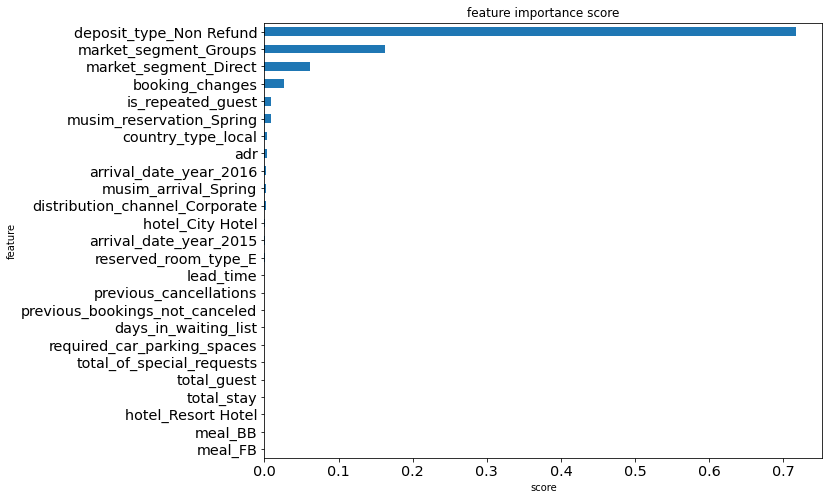

In [67]:
show_feature_importance(model.best_estimator_)

## Random Forest

### Fit Model

In [39]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42)
rf.fit(Xtrain, ytrain)
eval_classification(rf)

Accuracy (Test Set): 0.85
Precision (Test Set): 0.78
Recall (Test Set): 0.84
F1-Score (Test Set): 0.81
roc_auc (test-proba): 0.94
roc_auc (train-proba): 1.00


### Hyperparameter Tuning

In [40]:
# tuning hyperparameter RF
from sklearn.model_selection import RandomizedSearchCV

n_estimators = [int(x) for x in np.linspace(1, 200, 50)]
criterion = ['gini', 'entropy']
max_depth = [int(x) for x in np.linspace(2, 100, 50)]
min_samples_split = [int(x) for x in np.linspace(2, 20, 10)]
min_samples_leaf = [int(x) for x in np.linspace(2, 20, 10)]
hyperparameters = dict(n_estimators=n_estimators, criterion=criterion, max_depth=max_depth,
                       min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf)

rf = RandomForestClassifier(random_state=42)
rs = RandomizedSearchCV(rf, hyperparameters, scoring='roc_auc', random_state=1, cv=5)
rs.fit(Xtrain, ytrain)
eval_classification(rs)

Accuracy (Test Set): 0.88
Precision (Test Set): 0.83
Recall (Test Set): 0.84
F1-Score (Test Set): 0.83
roc_auc (test-proba): 0.95
roc_auc (train-proba): 0.98


### Learning Curve

param value: 2; train: 0.9941045843623972; test: 0.9453190317253786
param value: 3; train: 0.9877826912920062; test: 0.9454001163248255
param value: 4; train: 0.983415314026733; test: 0.9455556939182034
param value: 5; train: 0.9800472560573061; test: 0.945390185919692
param value: 7; train: 0.9753766806523008; test: 0.9448327596767107
param value: 8; train: 0.9739753005517163; test: 0.9456283174834572
param value: 9; train: 0.9726511153799878; test: 0.9442111783803834
param value: 11; train: 0.9701645026965495; test: 0.9454522359963472
param value: 12; train: 0.9693265136279203; test: 0.944636884678766
param value: 13; train: 0.9686225649909421; test: 0.9448595822393717
param value: 14; train: 0.9675124488049953; test: 0.9426398674942971
param value: 16; train: 0.9661885674965635; test: 0.9443631479764141
param value: 17; train: 0.966229060870252; test: 0.9448715615383355
param value: 18; train: 0.9648111575262179; test: 0.9434741748186656
param value: 20; train: 0.9637673426169487; t

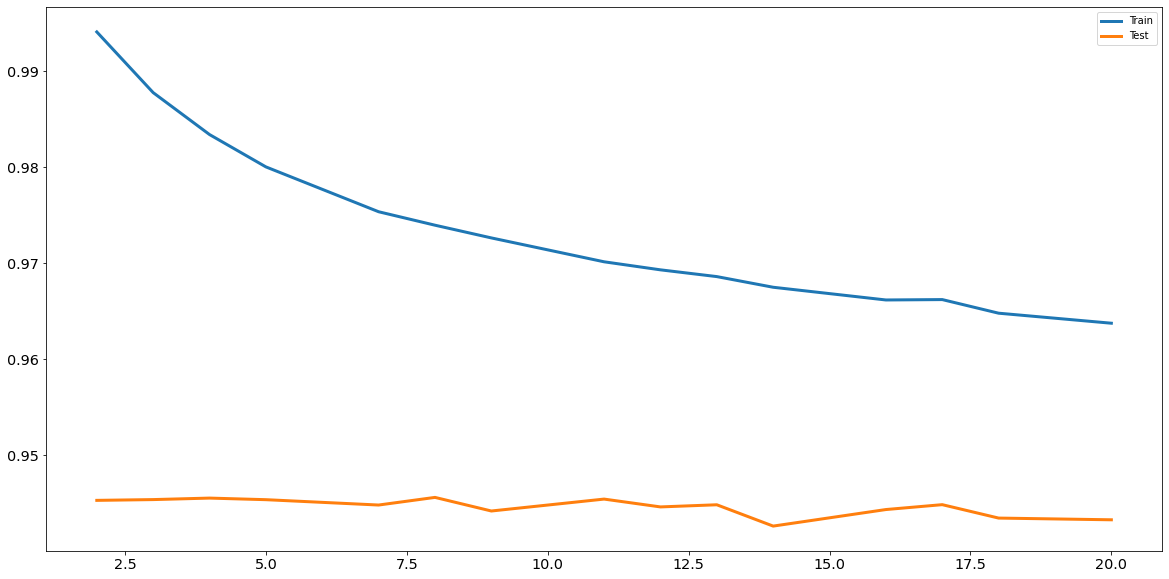

In [41]:
#learning curve
param_values = [int(x) for x in np.linspace(2, 20, 15)] # min_samples_leaf

train_scores = []
test_scores = []

for c in param_values:
    model = RandomForestClassifier(n_estimators=75, min_samples_leaf=c)
    model.fit(Xtrain, ytrain)

    # eval on train
    y_pred_train_proba = model.predict_proba(Xtrain)
    train_auc = roc_auc_score(ytrain, y_pred_train_proba[:,1])
    train_scores.append(train_auc)

    # eval on test
    y_pred_proba = model.predict_proba(Xtest)
    test_auc = roc_auc_score(ytest, y_pred_proba[:,1])
    test_scores.append(test_auc)

    print('param value: ' + str(c) + '; train: ' + str(train_auc) + '; test: '+ str(test_auc))

plt.plot(param_values, train_scores, label='Train')
plt.plot(param_values, test_scores, label='Test')
plt.legend()
plt.show()

### Feature Importance

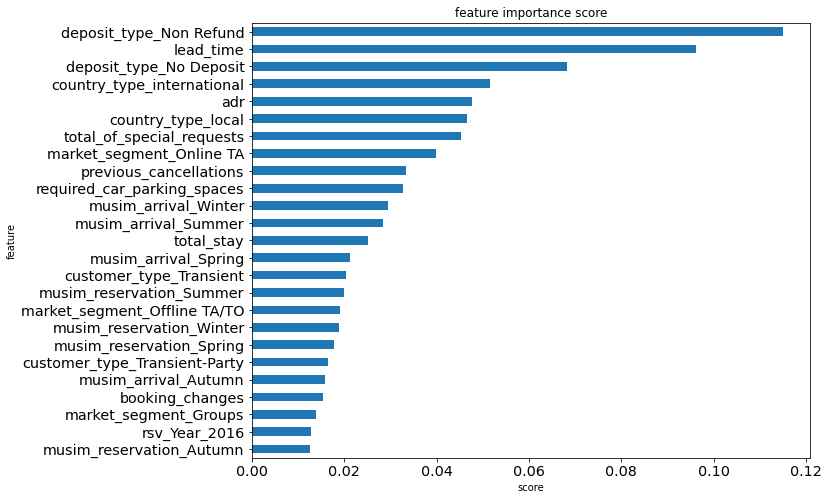

In [42]:
show_feature_importance(rs.best_estimator_)

## Linear Regression

### Fit Model

In [43]:
#logistic regression
from sklearn.linear_model import LogisticRegression # import logistic regression dari sklearn
logreg = LogisticRegression() # inisiasi object dengan nama logreg
logreg.fit(Xtrain, ytrain) # fit model regression dari data train
eval_classification(logreg)

Accuracy (Test Set): 0.38
Precision (Test Set): 0.38
Recall (Test Set): 1.00
F1-Score (Test Set): 0.55
roc_auc (test-proba): 0.59
roc_auc (train-proba): 0.90


### Hyperparameter Tuning

In [44]:
from sklearn.model_selection import RandomizedSearchCV

penalty = ['l1', 'l2']
C = [float(x) for x in np.linspace(0.0001, 0.05, 100)]
hyperparameters = dict(penalty=penalty, C=C)

logreg = LogisticRegression()
rs = RandomizedSearchCV(logreg, hyperparameters, scoring='roc_auc', random_state=1, cv=5)
rs.fit(Xtrain, ytrain)
eval_classification(rs)

Accuracy (Test Set): 0.38
Precision (Test Set): 0.38
Recall (Test Set): 1.00
F1-Score (Test Set): 0.55
roc_auc (test-proba): 0.58
roc_auc (train-proba): 0.90


### Feature Importance

In [46]:
X.columns

Index(['lead_time', 'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'booking_changes',
       'days_in_waiting_list', 'adr', 'required_car_parking_spaces',
       'total_of_special_requests', 'total_guest', 'total_stay',
       'hotel_City Hotel', 'hotel_Resort Hotel', 'meal_BB', 'meal_FB',
       'meal_HB', 'meal_SC', 'meal_Undefined', 'deposit_type_No Deposit',
       'deposit_type_Non Refund', 'deposit_type_Refundable',
       'customer_type_Contract', 'customer_type_Group',
       'customer_type_Transient', 'customer_type_Transient-Party',
       'market_segment_Aviation', 'market_segment_Complementary',
       'market_segment_Corporate', 'market_segment_Direct',
       'market_segment_Groups', 'market_segment_Offline TA/TO',
       'market_segment_Online TA', 'market_segment_Undefined',
       'distribution_channel_Corporate', 'distribution_channel_Direct',
       'distribution_channel_GDS', 'distribution_channel_TA/TO',
       'distribution

In [47]:
rs.best_estimator_.coef_

array([[ 4.53607461e-01, -5.69001405e-01,  1.97792771e+00,
        -3.74724384e-01, -3.61667628e-01, -2.36334350e-03,
         4.00843738e-01, -2.98581622e+00, -6.97554985e-01,
         1.32984875e-01,  7.99543236e-02,  1.07405996e-01,
        -1.08231646e-01,  1.89936272e-02,  2.84792834e-01,
        -1.87113481e-01,  3.48054211e-01, -4.65552842e-01,
        -1.61490053e+00,  1.97610935e+00, -3.62034473e-01,
        -2.29160663e-01, -2.28849094e-01,  4.83999164e-01,
        -2.68150580e-02,  2.24269505e-02,  1.43083476e-01,
        -5.87316865e-01, -9.89049636e-02,  1.01296713e-01,
        -5.01895285e-01,  8.93073220e-01,  2.74111026e-02,
         2.13415754e-01, -2.42258668e-01, -1.75788751e-01,
         1.52631424e-01,  5.11745897e-02, -8.36795681e-01,
         8.35970031e-01, -1.75085440e+00, -7.41802974e-01,
         2.49183173e+00,  6.35239944e-02,  1.18278969e-01,
         3.84291914e-02,  9.83727309e-02,  1.36735454e-01,
        -2.65132441e-01, -2.49416243e-01, -4.09807041e-0

## XGBoost

### Fit Model

In [61]:
from xgboost import XGBClassifier

xg = XGBClassifier()
xg.fit(Xtrain, ytrain)
eval_classification(xg)

Accuracy (Test Set): 0.80
Precision (Test Set): 0.69
Recall (Test Set): 0.87
F1-Score (Test Set): 0.77
roc_auc (test-proba): 0.93
roc_auc (train-proba): 0.97


In [50]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
import numpy as np

#Menjadikan ke dalam bentuk dictionary
hyperparameters = {}

# Init
from xgboost import XGBClassifier
xg = XGBClassifier(random_state=42)
xg_tuned = RandomizedSearchCV(xg, hyperparameters, cv=5, random_state=42, scoring='recall')
xg_tuned.fit(Xtrain,ytrain)

# Predict & Evaluation
eval_classification(xg_tuned)

Accuracy (Test Set): 0.80
Precision (Test Set): 0.69
Recall (Test Set): 0.87
F1-Score (Test Set): 0.77
roc_auc (test-proba): 0.93
roc_auc (train-proba): 0.97


### Feature Importance

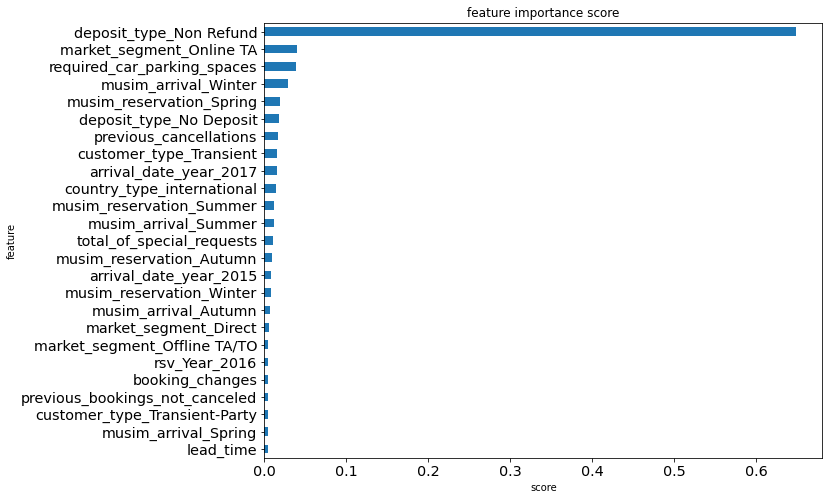

In [69]:
show_feature_importance(xg)